# Data cleanup

In [1]:
import pandas as pd
import os
from nltk.tokenize import RegexpTokenizer
import ast
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/home/ubuntu/data/downloads/disaster_response_messages_training.csv", dtype={"split": str, "message": str, "original": str, "genre": str})
df.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,12,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
def standardize_text(df, text_field1, text_field2):
    df[text_field2] = df[text_field1].str.replace(r"http\S+", "")
    df[text_field2] = df[text_field2].str.replace(r"http", "")
    df[text_field2] = df[text_field2].str.replace(r"@\S+", "")
    df[text_field2] = df[text_field2].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field2] = df[text_field2].str.replace(r"@", "at")
    df[text_field2] = df[text_field2].str.lower()

In [6]:
standardize_text(df, "message", "message_std")
df.head(30)

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_std
0,2,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,weather update a cold front from cuba that c...
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,is the hurricane over or is it not over
2,12,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"says west side of haiti, rest of the country ..."
3,14,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,information about the national palace
4,15,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,storm at sacred heart of jesus
5,16,train,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,"please, we need tents and water we are in sil..."
6,17,train,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"i would like to receive the messages, thank you"
7,20,train,"There's nothing to eat and water, we starving ...",Bon repo pa gen anyen menm grangou swaf,direct,1,0,1,0,1,...,1,1,1,0,0,0,0,0,1,"there's nothing to eat and water, we starving ..."
8,21,train,I am in Petionville. I need more information r...,M nan pv mvle plis enfomasyon sou 4636,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,i am in petionville i need more information r...
9,22,train,"I am in Thomassin number 32, in the area named...",Mwen thomassin 32 nan pyron mwen ta renmen jwe...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,"i am in thomassin number 32, in the area named..."


In [9]:
df_val = pd.read_csv("/home/ubuntu/data/downloads/disaster_response_messages_validation.csv", dtype={"split": str, "message": str, "original": str, "genre": str})
standardize_text(df_val, "message", "message_std")


In [10]:
df_tst = pd.read_csv("/home/ubuntu/data/downloads/disaster_response_messages_test.csv", dtype={"split": str, "message": str, "original": str, "genre": str})
standardize_text(df_tst, "message", "message_std")


In [17]:
tokenizer = RegexpTokenizer(r"\w+")
df["tokens"] = df["message_std"].apply(tokenizer.tokenize)
df_val["tokens"] = df_val["message_std"].apply(tokenizer.tokenize)
df_tst["tokens"] = df_tst["message_std"].apply(tokenizer.tokenize)

df.to_csv("/home/ubuntu/data/cleaned/disaster_response_messages_training.csv")
df_val.to_csv("/home/ubuntu/data/cleaned/disaster_response_messages_validation.csv")
df_tst.to_csv("/home/ubuntu/data/cleaned/disaster_response_messages_test.csv")

In order to interpret the tokens as lists, after reloading we need to use the function `ast.literal_eval`.

In [30]:
df2 = pd.read_csv("/home/ubuntu/data/cleaned/disaster_response_messages_training.csv", dtype={"split": str, "message": str, "original": str, "genre": str})

In [31]:
df2["tokens"].head(30)

0     ['weather', 'update', 'a', 'cold', 'front', 'f...
1     ['is', 'the', 'hurricane', 'over', 'or', 'is',...
2     ['says', 'west', 'side', 'of', 'haiti', 'rest'...
3     ['information', 'about', 'the', 'national', 'p...
4     ['storm', 'at', 'sacred', 'heart', 'of', 'jesus']
5     ['please', 'we', 'need', 'tents', 'and', 'wate...
6     ['i', 'would', 'like', 'to', 'receive', 'the',...
7     ['there', 's', 'nothing', 'to', 'eat', 'and', ...
8     ['i', 'am', 'in', 'petionville', 'i', 'need', ...
9     ['i', 'am', 'in', 'thomassin', 'number', '32',...
10    ['let', 's', 'do', 'it', 'together', 'need', '...
11    ['more', 'information', 'on', 'the', '4636', '...
12    ['a', 'comitee', 'in', 'delmas', '19', 'rue', ...
13    ['we', 'need', 'food', 'and', 'water', 'in', '...
14    ['i', 'don', 't', 'understand', 'how', 'to', '...
15    ['i', 'would', 'like', 'to', 'know', 'if', 'th...
16    ['i', 'would', 'like', 'to', 'know', 'if', 'on...
17    ['i', 'm', 'in', 'laplaine', 'i', 'am', 'a

In [32]:
type(df2["tokens"].iloc[0])

str

In [33]:
df2["tokens"] = df2["tokens"].apply(ast.literal_eval)

In [34]:
type(df2["tokens"].iloc[0])

list

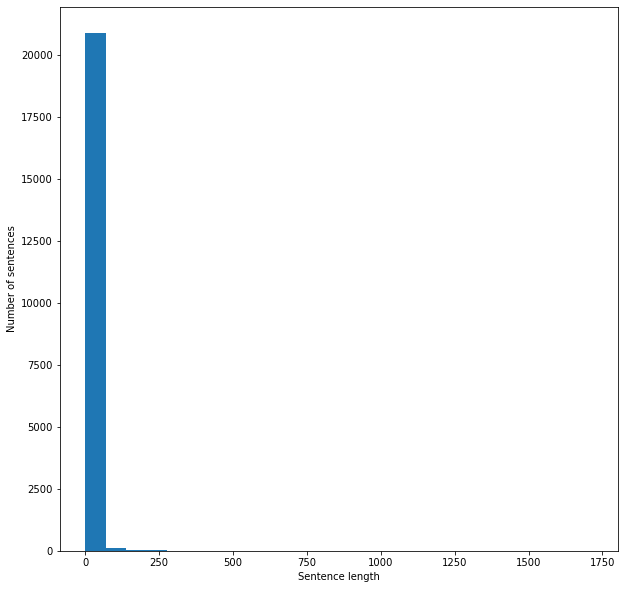

In [38]:
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
fig = plt.figure(figsize=(10, 10))
plt.xlabel("Sentence length")
plt.ylabel("Number of sentences")
plt.hist(sentence_lengths, bins=25)
plt.show()

In [46]:
pd.set_option("display.max_colwidth", 100)
df["message_std"][df["tokens"].apply(len) > 200]

11000    prior to this disaster, we experienced devastating veld fires because we went almost immediately...
11389    however, i must stress that the united nations system's efforts to mobilize international assist...
11828    my youngest son, who is six, has severe stomach cramps and diarrhoea  in the same year tokyo als...
11841    however, i must stress that the united nations system's efforts to mobilize international assist...
11850    we are seeing very intense, torrential showers over a short period of time completely saturating...
11853    locally, in march we are conducting our largest annual fundraising event, red cross calling, whi...
12606    we are afraid of a huge mudslide triggered by heavy rain  media contact francine uenuma 202 450 ...
12728    houses have been completely buried under loess from a hillside  in thailand schools based progra...
12733    since 22 november 2008, there has been 719 4 mm of rainfall and cyclonic winds up to 80km hr in ...
12772    three fire

In [47]:
df["message_std"][df["tokens"].apply(len) < 5]

420       graphic designer   it professional 
1186            sports information  football 
1357         information regarding earthquake
1384          i wouldlike information please 
2022     information regarding the earthquake
                         ...                 
18065                                   name?
18583          we vaccinated against measles 
19410     myanmar logistics cluster website  
19494     banyamulenge facing "extermination"
20698         different fire rescue equipment
Name: message_std, Length: 87, dtype: object